In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

Dataset
Source: Use stock price data from the Yahoo Finance API.
Pick any 3 large cap stocks from the Indian Market and apply the analysis on all three.

I have choosen the following three large-cap stocks from the Indian Market:

Reliance Industries: Ticker - RELIANCE.NS
Tata Consultancy Services: Ticker - TCS.NS
HDFC Bank: Ticker - HDFCBANK.NS

In [2]:
# Define stock tickers and date range
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']
start_date = '2017-01-01'
end_date = '2021-12-31'

# Download data for each ticker
data = {}
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data
    print(f"Downloaded data for {ticker}")

[*********************100%***********************]  1 of 1 completed


Downloaded data for RELIANCE.NS


[*********************100%***********************]  1 of 1 completed


Downloaded data for TCS.NS


[*********************100%***********************]  1 of 1 completed

Downloaded data for HDFCBANK.NS


In [3]:
for ticker, stock_data in data.items():
    stock_data.to_csv(f'{ticker}_data.csv')
    print(f"Saved {ticker} data to CSV.")


Saved RELIANCE.NS data to CSV.
Saved TCS.NS data to CSV.
Saved HDFCBANK.NS data to CSV.


Task 1: Data Understanding and Preprocessing
Fetch the stock price data (e.g., daily closing prices) for a period of at least 5 years.
Perform exploratory data analysis (EDA):
Plot the stock price over time.
Check for missing values and handle them appropriately.
Compute basic statistics (mean, variance, etc.).

Plotting the collected data into three seperate graphs as well as in a single combined dataframe!

Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2017-01-02  236.274673  237.341621  233.498422  236.035147     7097888
2017-01-03  237.210983  238.865853  235.403711  237.308980     6434204
2017-01-04  232.366165  237.994863  231.745596  237.973089    10392483
2017-01-05  234.598038  235.142398  232.714557  233.204483     8734164
2017-01-06  234.064545  236.252888  233.661714  233.901241     7845839
Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2017-01-02  1009.084106  1014.959943  1005.259388  1011.327608   823132
2017-01-03  1012.032776  1013.507056  1001.370824  1009.041441  1475324
2017-01-04  1016.840210  1020.835820  1007.780759  1012.652320  1420066


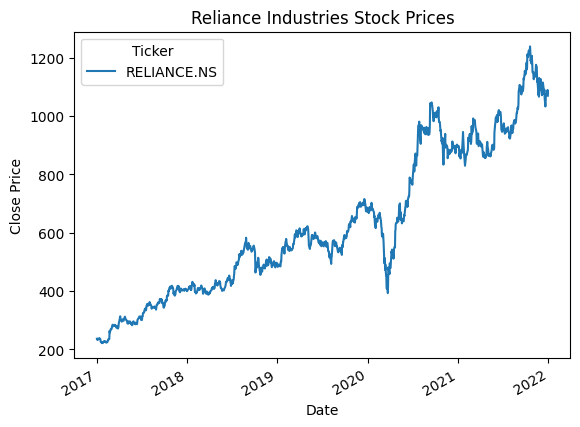

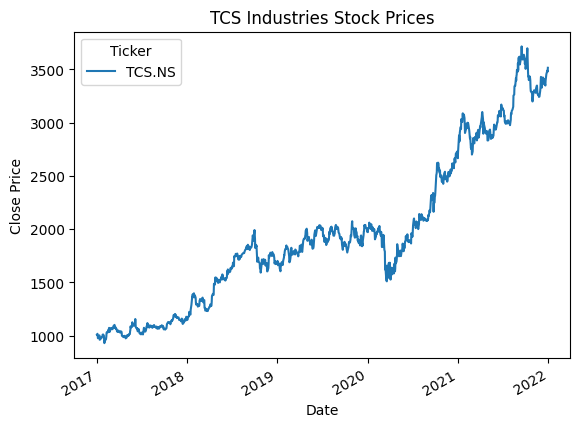

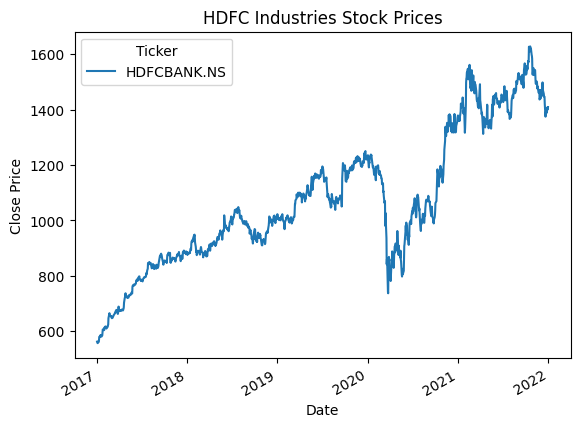

            RELIANCE.NS       TCS.NS  HDFCBANK.NS
Date                                             
2017-01-02   236.274673  1009.084106   562.424622
2017-01-03   237.210983  1012.032776   559.041748
2017-01-04   232.366165  1016.840210   556.974609
2017-01-05   234.598038   997.567322   557.303406
2017-01-06   234.064545   974.918884   560.803711


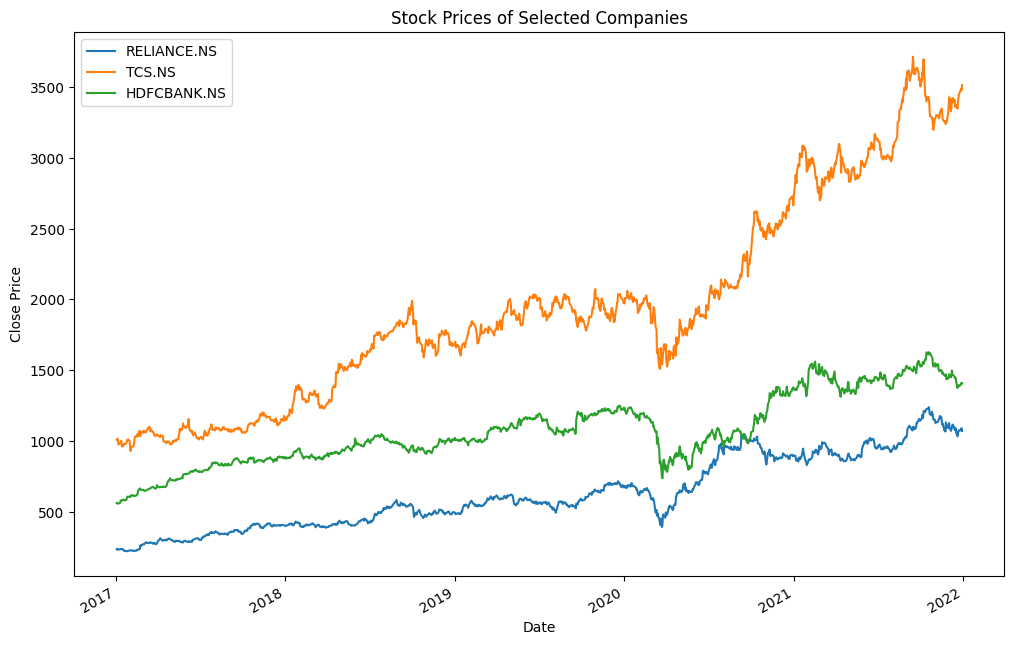

In [4]:
reliance_data = data['RELIANCE.NS']
tcs_data = data['TCS.NS']
hdfc_data = data['HDFCBANK.NS']

# Display the first few rows
print(reliance_data.head())
print(tcs_data.head())
print(hdfc_data.head())

# Plot the closing price
reliance_data['Close'].plot(title='Reliance Industries Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

tcs_data['Close'].plot(title='TCS Industries Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

hdfc_data['Close'].plot(title='HDFC Industries Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Combine the closing prices into a single DataFrame
combined_data = pd.DataFrame()

for ticker in tickers:
    if not data[ticker].empty:  # Ensure data exists for the ticker
        combined_data[ticker] = data[ticker]['Close']
    else:
        print(f"Skipping {ticker}: No data available.")


# Display the combined DataFrame
print(combined_data.head())

# Plot the combined closing prices
combined_data.plot(figsize=(12, 8), title="Stock Prices of Selected Companies")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(tickers)
plt.show()


Checking for missing values (None found) and then computing mean, variance, skewness, kurtosis, and other statistics.

In [5]:
# Check for missing values
print(combined_data.isnull().sum())

# Fill missing values (e.g., forward fill)
combined_data.fillna(method='ffill', inplace=True)

# Verify that there are no missing values
print(combined_data.isnull().sum())


RELIANCE.NS    0
TCS.NS         0
HDFCBANK.NS    0
dtype: int64
RELIANCE.NS    0
TCS.NS         0
HDFCBANK.NS    0
dtype: int64


C:\Users\aayus\AppData\Local\Temp\ipykernel_736\3068818200.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


In [6]:
# Compute basic statistics for the combined data
stats = combined_data.describe()

# Display the statistics
print("Basic Statistics for Stock Prices:")
print(stats)

variance = combined_data.var()
print("\nVariance of Stock Prices:")
print(variance)

skewness = combined_data.skew()
print("\nSkewness of Stock Prices:")
print(skewness)

kurtosis = combined_data.kurt()
print("\nKurtosis of Stock Prices:")
print(kurtosis)


Basic Statistics for Stock Prices:
       RELIANCE.NS       TCS.NS  HDFCBANK.NS
count  1235.000000  1235.000000  1235.000000
mean    629.676040  1951.241549  1073.155758
std     257.438002   719.805901   246.723596
min     221.206741   929.058838   556.974609
25%     412.778671  1360.299866   888.004150
50%     565.834290  1844.933594  1020.025391
75%     883.346344  2382.063477  1220.756836
max    1239.523071  3714.736572  1628.132080

Variance of Stock Prices:
RELIANCE.NS     66274.325106
TCS.NS         518120.534456
HDFCBANK.NS     60872.533019
dtype: float64

Skewness of Stock Prices:
RELIANCE.NS    0.446329
TCS.NS         0.628609
HDFCBANK.NS    0.285090
dtype: float64

Kurtosis of Stock Prices:
RELIANCE.NS   -0.941938
TCS.NS        -0.512565
HDFCBANK.NS   -0.700211
dtype: float64


Why not plot the mean and variance ?

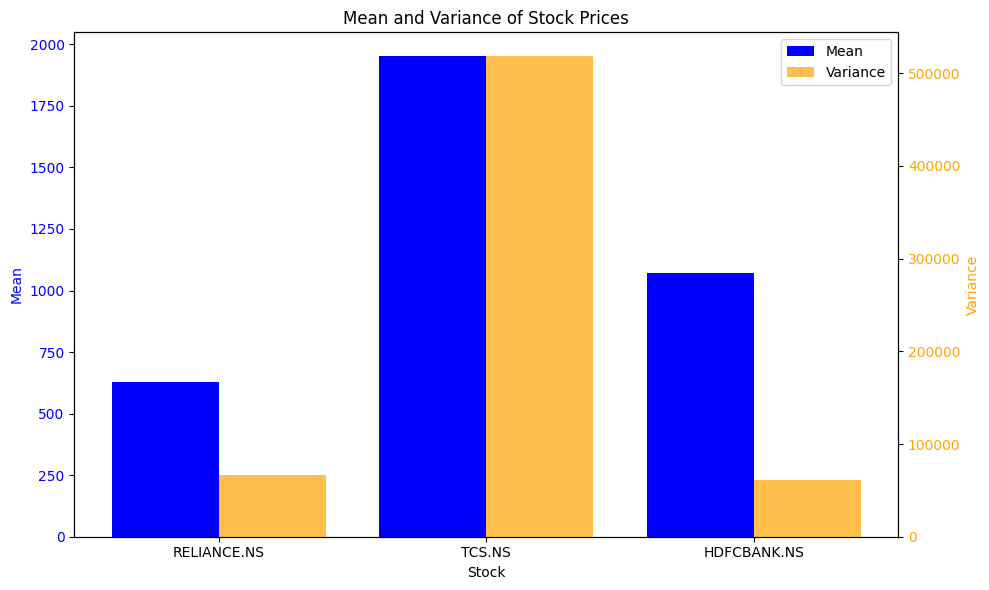

In [7]:
# Compute mean and variance
mean = combined_data.mean()
variance = combined_data.var()

# Create x positions for bars
x = np.arange(len(mean))  # Positions for stocks
width = 0.4  # Width of bars

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the mean on the primary y-axis
color = 'blue'
ax1.bar(x - width / 2, mean.values, width, color=color, label='Mean')
ax1.set_xlabel('Stock')
ax1.set_ylabel('Mean', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title("Mean and Variance of Stock Prices")
ax1.set_xticks(x)
ax1.set_xticklabels(mean.index)

# Create a secondary y-axis for variance
ax2 = ax1.twinx()
color = 'orange'
ax2.bar(x + width / 2, variance.values, width, color=color, alpha=0.7, label='Variance')
ax2.set_ylabel('Variance', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

Task 2: Stationarity and Decomposition
Conduct the Augmented Dickey-Fuller (ADF) test to check stationarity.
If non-stationary, apply differencing and retest.
Decompose the time series into trend, seasonal, and residual components.

The ADF test checks if the time series is stationary. If the p-value is greater than 0.05, we consider the series non-stationary.

In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to perform the ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] > 0.05:
        print("The series is non-stationary.")
    else:
        print("The series is stationary.")

# Perform the ADF test for each stock
for ticker in combined_data.columns:
    print(f"\nADF Test for {ticker}:")
    adf_test(combined_data[ticker])


ADF Test for RELIANCE.NS:
ADF Statistic: -0.696693194035865
p-value: 0.8476042167971616
Critical Values:
   1%: -3.435660336370594
   5%: -2.863885022214541
   10%: -2.568018522153254
The series is non-stationary.

ADF Test for TCS.NS:
ADF Statistic: 0.3352055132732587
p-value: 0.9789032765819559
Critical Values:
   1%: -3.4356689751083374
   5%: -2.8638888336592387
   10%: -2.5680205519744055
The series is non-stationary.

ADF Test for HDFCBANK.NS:
ADF Statistic: -1.6631047429324366
p-value: 0.45021520003473886
Critical Values:
   1%: -3.435690695421723
   5%: -2.863898416697677
   10%: -2.5680256555204184
The series is non-stationary.


Since all of the three are non-stationary, we apply differencing and retest them.

In [9]:
# Apply differencing for non-stationary series
differenced_data = combined_data.diff().dropna()

# Retest stationarity after differencing
for ticker in differenced_data.columns:
    print(f"\nADF Test for Differenced {ticker}:")
    adf_test(differenced_data[ticker])



ADF Test for Differenced RELIANCE.NS:
ADF Statistic: -34.854451455124575
p-value: 0.0
Critical Values:
   1%: -3.4356646522289815
   5%: -2.863886926389418
   10%: -2.568019536239491
The series is stationary.

ADF Test for Differenced TCS.NS:
ADF Statistic: -26.562083163727724
p-value: 0.0
Critical Values:
   1%: -3.4356689751083374
   5%: -2.8638888336592387
   10%: -2.5680205519744055
The series is stationary.

ADF Test for Differenced HDFCBANK.NS:
ADF Statistic: -13.004311873136235
p-value: 2.6473066435737842e-24
Critical Values:
   1%: -3.435690695421723
   5%: -2.863898416697677
   10%: -2.5680256555204184
The series is stationary.


Lets Go!


Decomposition for RELIANCE.NS:


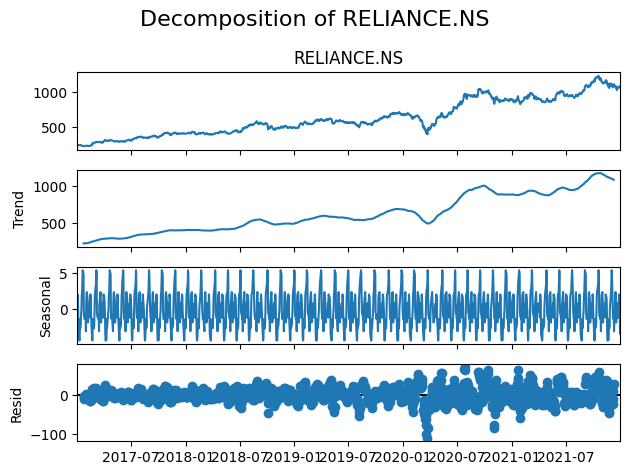


Decomposition for TCS.NS:


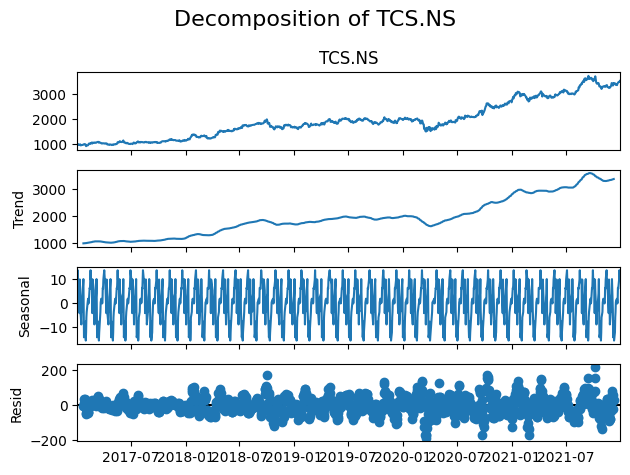


Decomposition for HDFCBANK.NS:


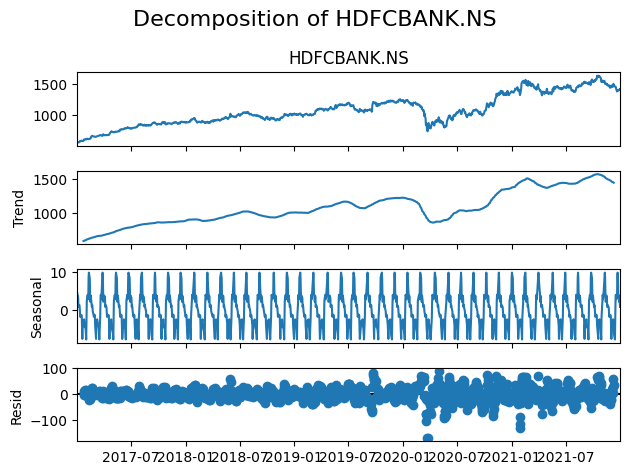

In [10]:
# Decompose each stock's time series
for ticker in combined_data.columns:
    print(f"\nDecomposition for {ticker}:")
    decomposition = seasonal_decompose(combined_data[ticker], model='additive', period=30)

    # Plot the decomposition
    decomposition.plot()
    plt.suptitle(f"Decomposition of {ticker}", fontsize=16)
    plt.tight_layout()
    plt.show()


Explanation

ADF Test:
The null hypothesis: The series is non-stationary.
A p-value > 0.05 indicates non-stationarity.

Differencing:
First-order differencing removes linear trends.
Repeat differencing if the series remains non-stationary.

Decomposition:
Trend: Captures the overall direction of the series.
Seasonality: Captures periodic patterns.
Residual: Captures random noise or unexplained variation.

Task 3: Model Implementation and Forecasting
ARIMA Modeling:
Identify the order (p,d,q) using ACF and PACF plots.
Fit an ARIMA model to the data.
Evaluate its residuals for randomness and check model assumptions.
SARIMA Modeling:
Identify seasonal patterns and fit a SARIMA model with order (p,d,q) and seasonal order - (P,D,Q,s).
Research-Based Approach:
Research and apply SARIMAX, incorporating an independent variable Volume.

ARIMA Modeling
Identify the Order (p, d, q) Using ACF and PACF Plots
To determine the ARIMA order, we analyze the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.


ACF and PACF for RELIANCE.NS:


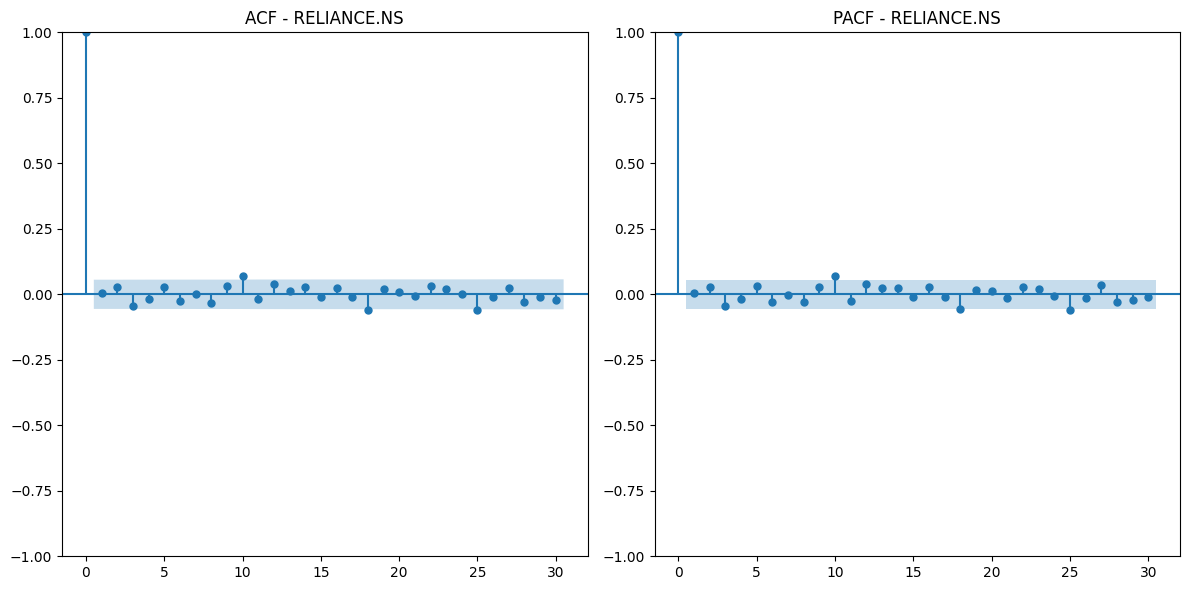


ACF and PACF for TCS.NS:


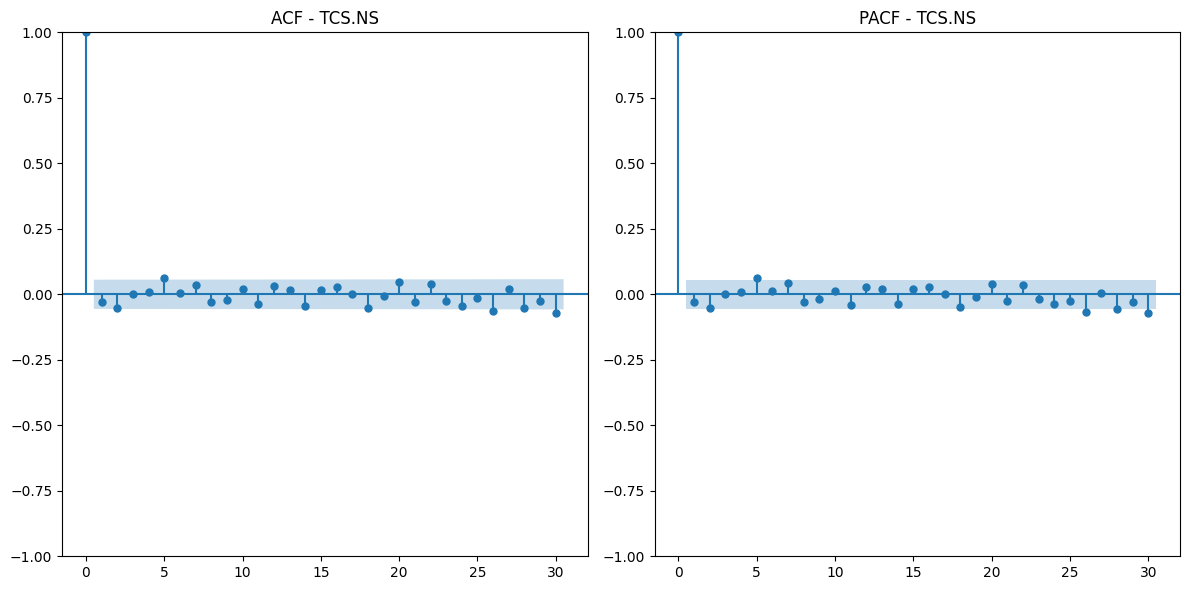


ACF and PACF for HDFCBANK.NS:


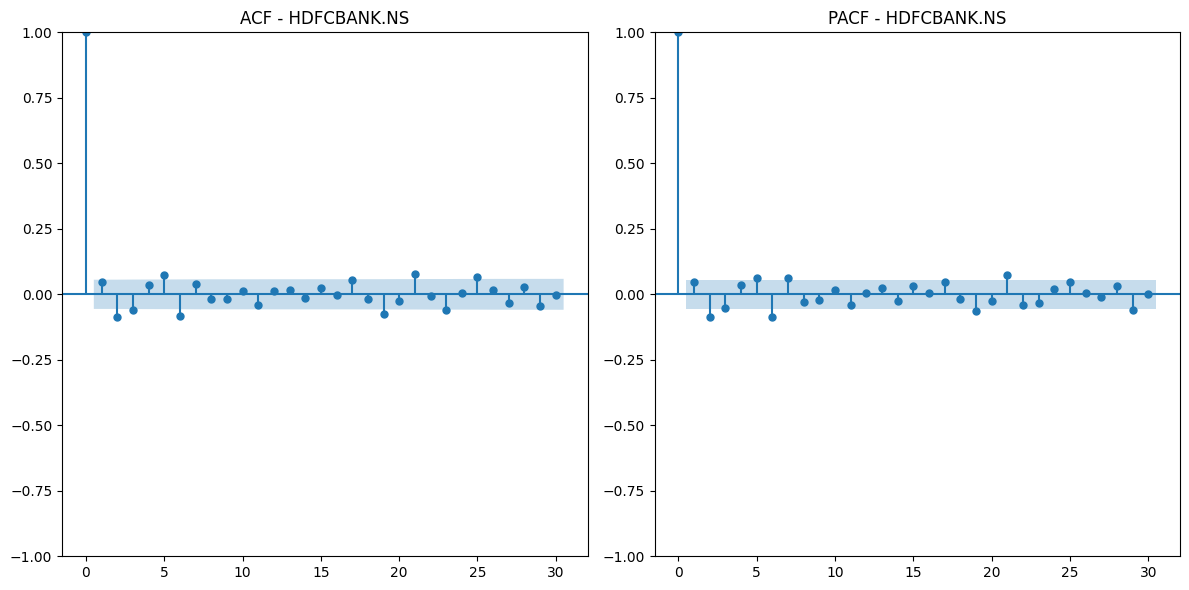

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for each stock
for ticker in differenced_data.columns:
    print(f"\nACF and PACF for {ticker}:")
    plt.figure(figsize=(12, 6))
    
    # ACF Plot
    plt.subplot(1, 2, 1)
    plot_acf(differenced_data[ticker], ax=plt.gca(), lags=30)
    plt.title(f"ACF - {ticker}")
    
    # PACF Plot
    plt.subplot(1, 2, 2)
    plot_pacf(differenced_data[ticker], ax=plt.gca(), lags=30)
    plt.title(f"PACF - {ticker}")
    
    plt.tight_layout()
    plt.show()


Use the identified (p, d, q) values to fit an ARIMA model.


Fitting ARIMA Model for RELIANCE.NS


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

                               SARIMAX Results                                
Dep. Variable:            RELIANCE.NS   No. Observations:                 1235
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4891.017
Date:                Mon, 13 Jan 2025   AIC                           9788.034
Time:                        23:32:08   BIC                           9803.388
Sample:                             0   HQIC                          9793.809
                               - 1235                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9996      0.009   -105.673      0.000      -1.018      -0.981
ma.L1          0.9991      0.013     77.139      0.000       0.974       1.024
sigma2       162.2510      3.315     48.947      0.0

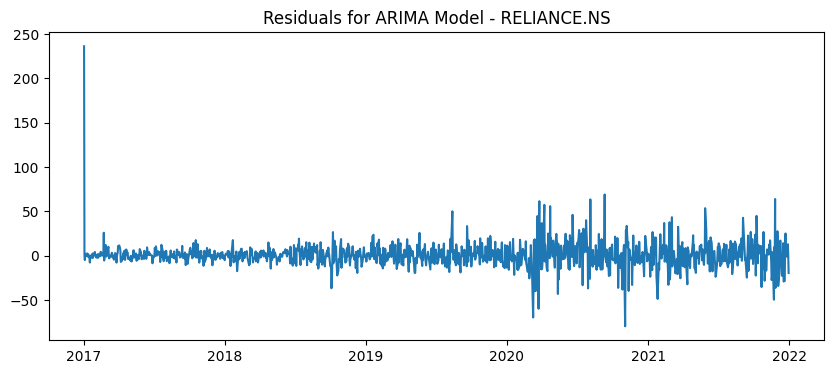


Fitting ARIMA Model for TCS.NS
                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                 1235
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6026.156
Date:                Mon, 13 Jan 2025   AIC                          12058.312
Time:                        23:32:08   BIC                          12073.666
Sample:                             0   HQIC                         12064.088
                               - 1235                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3611      0.436      0.828      0.408      -0.493       1.216
ma.L1         -0.3981      0.428     -0.930      0.352      -1.237       0.441
sigma2      1021.458

c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


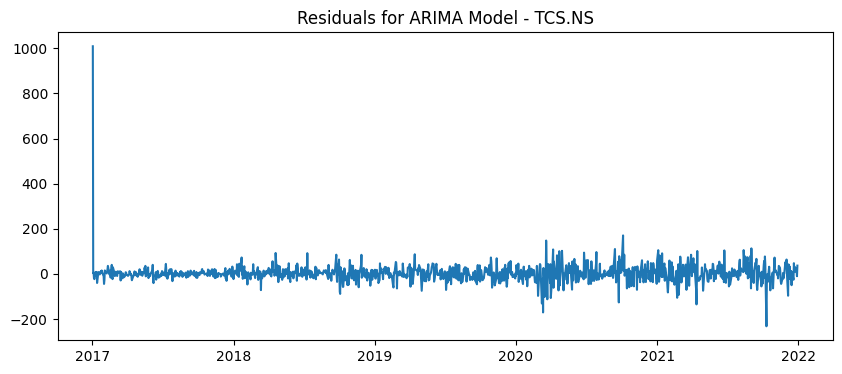


Fitting ARIMA Model for HDFCBANK.NS


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            HDFCBANK.NS   No. Observations:                 1235
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5235.382
Date:                Mon, 13 Jan 2025   AIC                          10476.765
Time:                        23:32:09   BIC                          10492.119
Sample:                             0   HQIC                         10482.541
                               - 1235                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8403      0.052    -16.078      0.000      -0.943      -0.738
ma.L1          0.8869      0.044     19.933      0.000       0.800       0.974
sigma2       283.5326      5.594     50.686      0.0

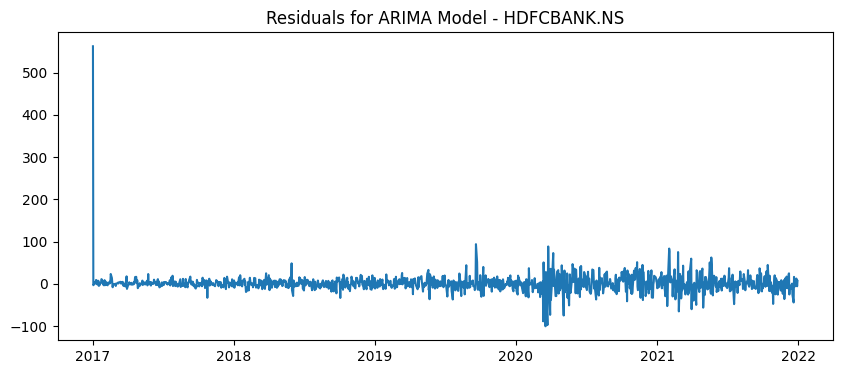

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA for each stock
for ticker in differenced_data.columns:
    print(f"\nFitting ARIMA Model for {ticker}")
    model = ARIMA(combined_data[ticker], order=(1, 1, 1))  # Replace (1,1,1) with identified (p,d,q)
    results = model.fit()
    print(results.summary())

    # Plot residuals to check randomness
    plt.figure(figsize=(10, 4))
    plt.plot(results.resid)
    plt.title(f"Residuals for ARIMA Model - {ticker}")
    plt.show()


Could be better...

ARIMA Modeling
Identifying Seasonal Patterns
Seasonality can be observed from decomposition. Identify the seasonal period s (e.g., s=12 for monthly seasonality in a year or s=7 for weekly).

Fit a SARIMA model with seasonal orders (P, D, Q, s).


Fitting SARIMA Model for RELIANCE.NS


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting 

                                     SARIMAX Results                                      
Dep. Variable:                        RELIANCE.NS   No. Observations:                 1235
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4870.385
Date:                            Mon, 13 Jan 2025   AIC                           9750.771
Time:                                    23:32:15   BIC                           9776.312
Sample:                                         0   HQIC                          9760.383
                                           - 1235                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9233      0.735      1.256      0.209      -0.517       2.364
ma.L1         -0.9215      0.744   

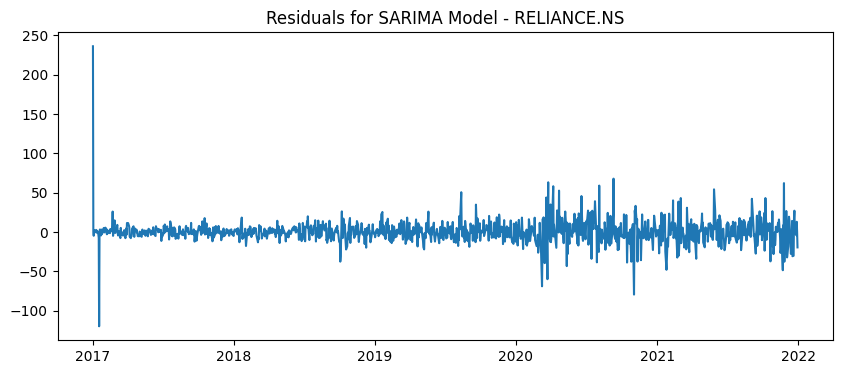


Fitting SARIMA Model for TCS.NS


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             TCS.NS   No. Observations:                 1235
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5990.963
Date:                            Mon, 13 Jan 2025   AIC                          11991.926
Time:                                    23:32:19   BIC                          12017.467
Sample:                                         0   HQIC                         12001.538
                                           - 1235                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3796      0.396      0.959      0.338      -0.397       1.156
ma.L1         -0.4205      0.388   

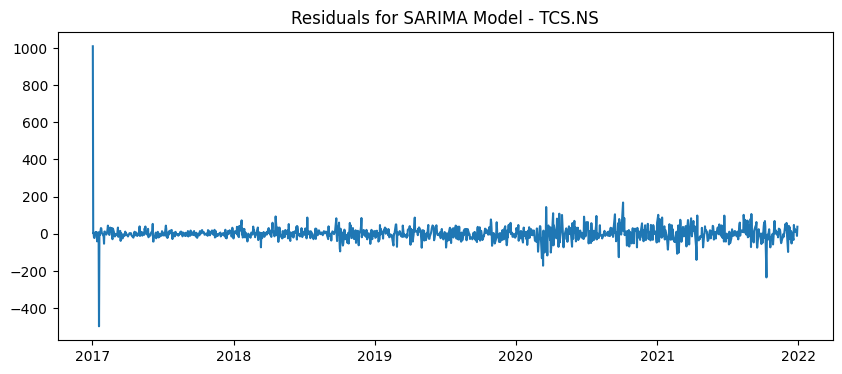


Fitting SARIMA Model for HDFCBANK.NS


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        HDFCBANK.NS   No. Observations:                 1235
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5211.569
Date:                            Mon, 13 Jan 2025   AIC                          10433.139
Time:                                    23:32:24   BIC                          10458.680
Sample:                                         0   HQIC                         10442.751
                                           - 1235                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8459      0.055    -15.263      0.000      -0.955      -0.737
ma.L1          0.8909      0.048   

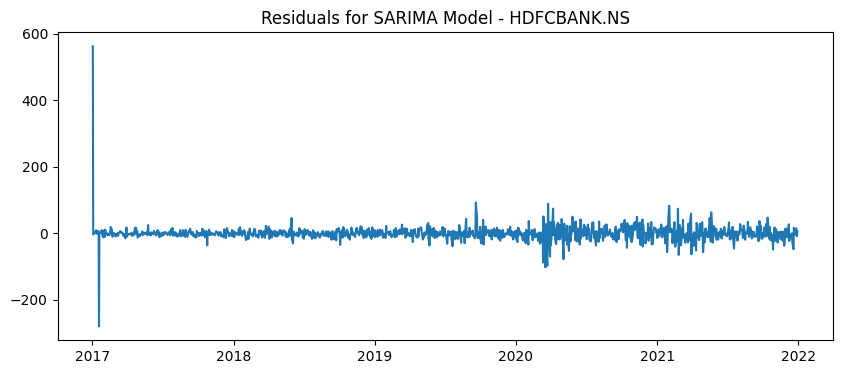

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA for each stock
for ticker in combined_data.columns:
    print(f"\nFitting SARIMA Model for {ticker}")
    model = SARIMAX(combined_data[ticker], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Replace with identified (P,D,Q,s)
    results = model.fit()
    print(results.summary())

    # Plot residuals
    plt.figure(figsize=(10, 4))
    plt.plot(results.resid)
    plt.title(f"Residuals for SARIMA Model - {ticker}")
    plt.show()


Seems Decent.

SARIMAX Modeling (Incorporating Volume)
Adding Volume as an Independent Variable

In [14]:
# Extract Volume for each stock - using squeeze or ravel
volume_data = {}
for ticker in tickers:

    volume_series = pd.Series(data[ticker]['Volume'].squeeze(), index=data[ticker].index)
    
    volume_data[ticker] = volume_series

volume_combined = pd.DataFrame(volume_data)

aligned_data = combined_data.join(volume_combined, rsuffix='_volume').dropna()

# Check the alignment
print(aligned_data.head())

            RELIANCE.NS       TCS.NS  HDFCBANK.NS  RELIANCE.NS_volume  \
Date                                                                    
2017-01-02   236.274673  1009.084106   562.424622             7097888   
2017-01-03   237.210983  1012.032776   559.041748             6434204   
2017-01-04   232.366165  1016.840210   556.974609            10392483   
2017-01-05   234.598038   997.567322   557.303406             8734164   
2017-01-06   234.064545   974.918884   560.803711             7845839   

            TCS.NS_volume  HDFCBANK.NS_volume  
Date                                           
2017-01-02         823132             1854328  
2017-01-03        1475324             1923750  
2017-01-04        1420066             3483560  
2017-01-05        2216404             3388192  
2017-01-06        3009896             2762630  


Fit the SARIMAX Model
Use the aligned data to pass Volume as an exogenous variable.


Fitting SARIMAX Model for RELIANCE.NS with Volume


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                        RELIANCE.NS   No. Observations:                 1235
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4985.442
Date:                            Mon, 13 Jan 2025   AIC                           9982.883
Time:                                    23:32:29   BIC                          10013.533
Sample:                                         0   HQIC                          9994.418
                                           - 1235                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
RELIANCE.NS_volume  1.342e-07    2.3e-08      5.830      0.000    8.91e-08    1.79e-07
ar.L1      

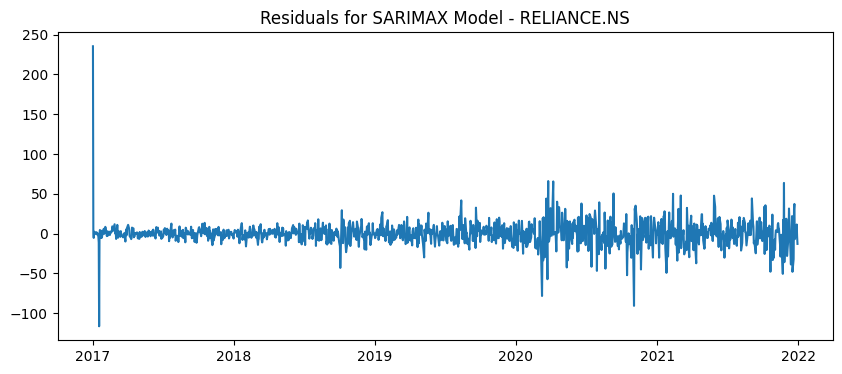


Fitting SARIMAX Model for TCS.NS with Volume


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             TCS.NS   No. Observations:                 1235
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6121.702
Date:                            Mon, 13 Jan 2025   AIC                          12255.404
Time:                                    23:32:33   BIC                          12286.053
Sample:                                         0   HQIC                         12266.939
                                           - 1235                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
TCS.NS_volume -4.859e-08   2.68e-07     -0.181      0.856   -5.73e-07    4.76e-07
ar.L1             0.3518  

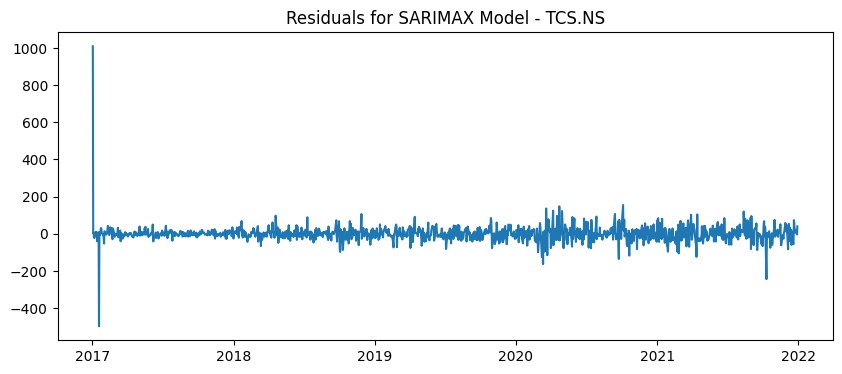


Fitting SARIMAX Model for HDFCBANK.NS with Volume


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                        HDFCBANK.NS   No. Observations:                 1235
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5355.190
Date:                            Mon, 13 Jan 2025   AIC                          10722.380
Time:                                    23:32:43   BIC                          10753.029
Sample:                                         0   HQIC                         10733.915
                                           - 1235                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
HDFCBANK.NS_volume  1.018e-07   7.23e-08      1.407      0.159      -4e-08    2.44e-07
ar.L1      

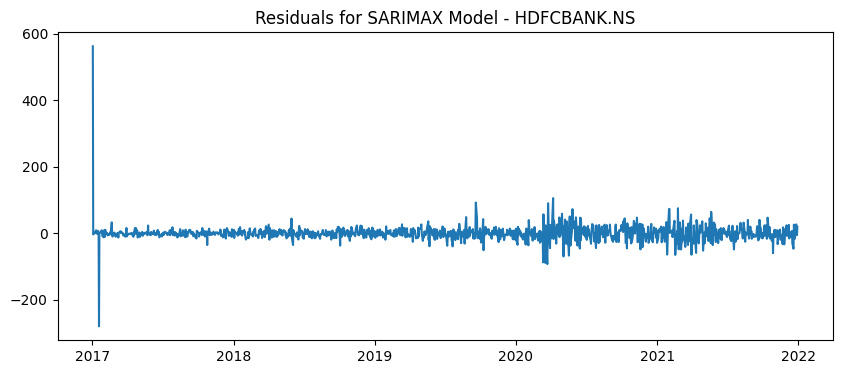

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

for ticker in combined_data.columns:
    print(f"\nFitting SARIMAX Model for {ticker} with Volume")
    exogenous_variable = aligned_data[f"{ticker}_volume"]

    # Fit the SARIMAX model
    model = SARIMAX(aligned_data[ticker], 
                    order=(1, 1, 1), 
                    seasonal_order=(1, 1, 1, 12), 
                    exog=exogenous_variable)
    results = model.fit()
    print(results.summary())

    plt.figure(figsize=(10, 4))
    plt.plot(results.resid)
    plt.title(f"Residuals for SARIMAX Model - {ticker}")
    plt.show()


Trust me it looks the same like that of SARIMA but is more precise.

Task 4: Forecasting and Prediction
Split the data into training and testing sets.
Forecast the next 30 days and compare the predictions against the actual test data.
Compute and compare error metrics (e.g., RMSE, MAE) for all models.

Splitting Data
Split the data into training and testing sets. Use 80% of the data for training and 20% for testing.

In [ ]:
combined_data.index = pd.to_datetime(combined_data.index) 
combined_data = combined_data.asfreq('B') 

combined_data.fillna(method='ffill', inplace=True)

train_end_date = int(len(combined_data) * 0.8) 
train_data = combined_data.iloc[:train_end_date]
test_data = combined_data.iloc[train_end_date:]

print(f"Train data: {train_data.index.min()} to {train_data.index.max()}")
print(f"Test data: {test_data.index.min()} to {test_data.index.max()}")


Train data: 2017-01-02 00:00:00 to 2020-12-30 00:00:00
Test data: 2020-12-31 00:00:00 to 2021-12-30 00:00:00


C:\Users\aayus\AppData\Local\Temp\ipykernel_736\38989895.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


Forecasting with ARIMA
For each stock, use the ARIMA model to forecast the next 30 days (aligned with test_data).

In [35]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

arima_forecasts = {}
arima_errors = {}

for ticker in combined_data.columns:
    print(f"\nForecasting {ticker} with ARIMA")
    arima_model = ARIMA(train_data[ticker], order=(1, 1, 1))  # Adjust (p, d, q) if necessary
    arima_result = arima_model.fit()

    forecast = arima_result.forecast(steps=len(test_data))
    arima_forecasts[ticker] = forecast

    errors = test_data[ticker] - forecast
    rmse = np.sqrt(np.mean(errors**2))
    mae = np.mean(np.abs(errors))
    arima_errors[ticker] = {'RMSE': rmse, 'MAE': mae}

    print(f"{ticker} - ARIMA RMSE: {rmse:.4f}, MAE: {mae:.4f}")



Forecasting RELIANCE.NS with ARIMA


c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\aayus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RELIANCE.NS - ARIMA RMSE: 141.6236, MAE: 106.0586

Forecasting TCS.NS with ARIMA
TCS.NS - ARIMA RMSE: 497.8009, MAE: 428.5003

Forecasting HDFCBANK.NS with ARIMA
HDFCBANK.NS - ARIMA RMSE: 103.7223, MAE: 84.9344


SARIMA Forecasting
We use SARIMA to handle seasonal patterns in the time series data. Seasonal parameters (P, D, Q, s) need to be defined, where s is the seasonal period (e.g., 12 for monthly data, 252 for trading days in a year).


Forecasting RELIANCE.NS with SARIMA
RELIANCE.NS - SARIMA RMSE: 72.0984, MAE: 56.6023


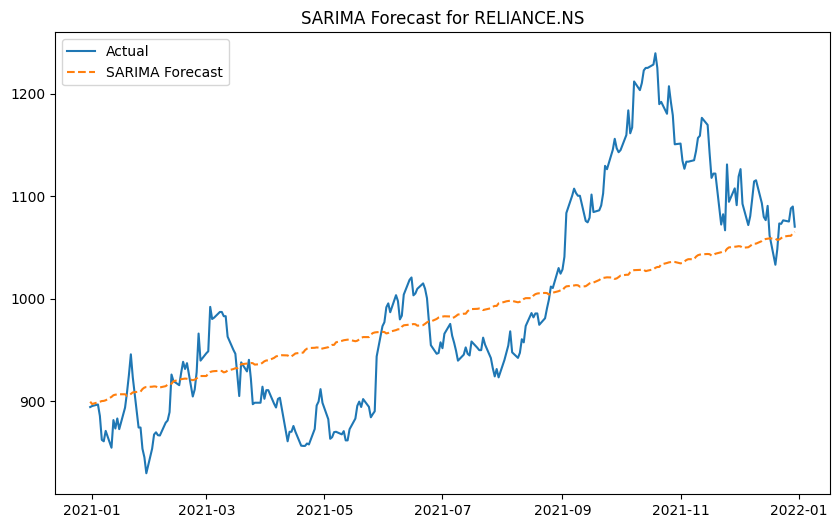


Forecasting TCS.NS with SARIMA
TCS.NS - SARIMA RMSE: 269.1752, MAE: 210.1846


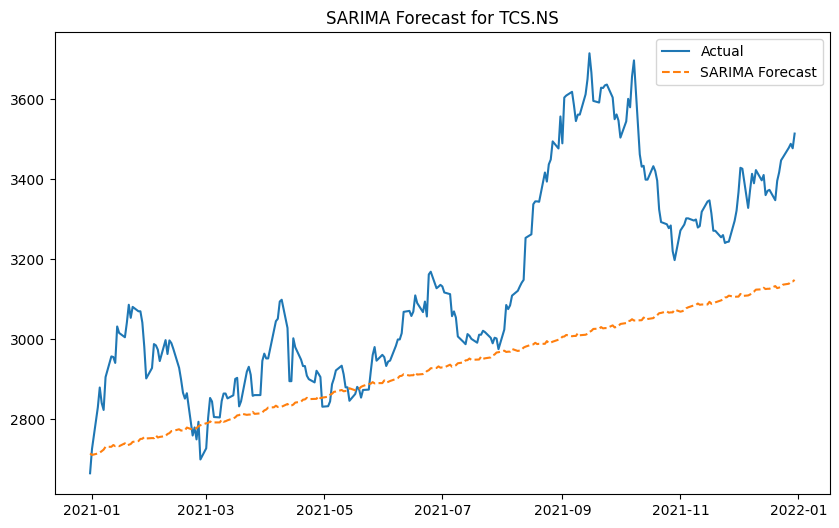


Forecasting HDFCBANK.NS with SARIMA
HDFCBANK.NS - SARIMA RMSE: 76.8905, MAE: 61.3986


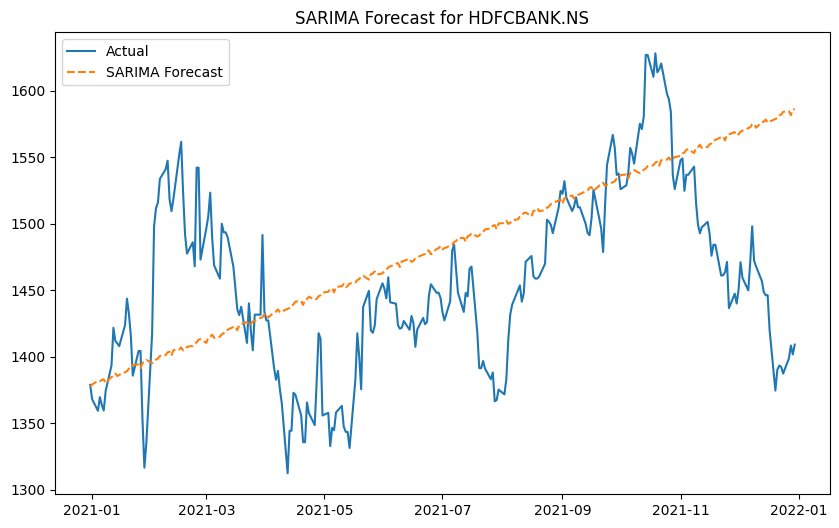

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_forecasts = {}
sarima_errors = {}

for ticker in combined_data.columns:
    print(f"\nForecasting {ticker} with SARIMA")
    sarima_model = SARIMAX(train_data[ticker], 
                           order=(1, 1, 1), 
                           seasonal_order=(1, 1, 1, 12))  # Adjust seasonal_order as needed
    sarima_result = sarima_model.fit(disp=False)

    forecast = sarima_result.forecast(steps=len(test_data))
    sarima_forecasts[ticker] = forecast

    errors = test_data[ticker] - forecast
    rmse = np.sqrt(np.mean(errors**2))
    mae = np.mean(np.abs(errors))
    sarima_errors[ticker] = {'RMSE': rmse, 'MAE': mae}

    print(f"{ticker} - SARIMA RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(test_data[ticker], label="Actual")
    plt.plot(forecast, label="SARIMA Forecast", linestyle='--')
    plt.title(f"SARIMA Forecast for {ticker}")
    plt.legend()
    plt.show()


SARIMAX Forecasting
SARIMAX allows incorporating exogenous variables (e.g., trading volume). We assume you’ve already aligned the volume data with the stock prices.


Forecasting RELIANCE.NS with SARIMAX (using Volume)


C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_train.fillna(method='ffill', inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_train.fillna(method='bfill', inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_test.fillna(method='ffill', inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_test.fillna(method='bfill', in

RELIANCE.NS - SARIMAX RMSE: 199.9999, MAE: 155.6247


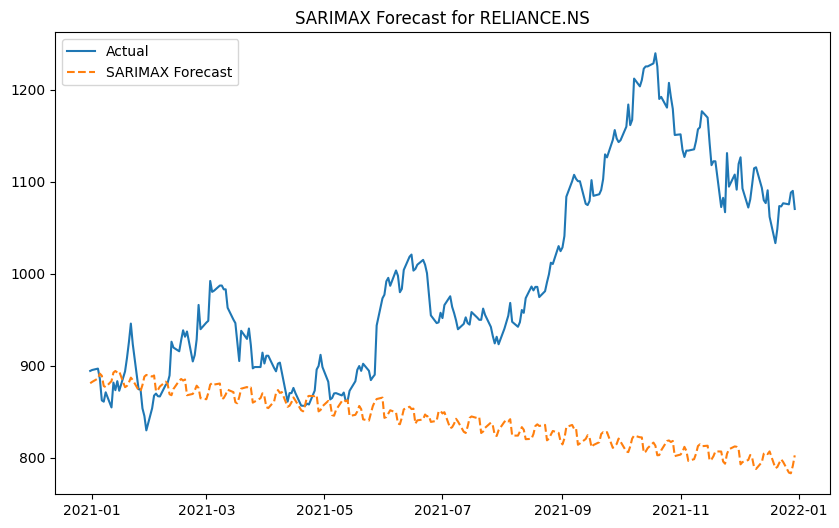


Forecasting TCS.NS with SARIMAX (using Volume)


C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_train.fillna(method='ffill', inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_train.fillna(method='bfill', inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_test.fillna(method='ffill', inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_test.fillna(method='bfill', in

TCS.NS - SARIMAX RMSE: 476.4545, MAE: 407.9434


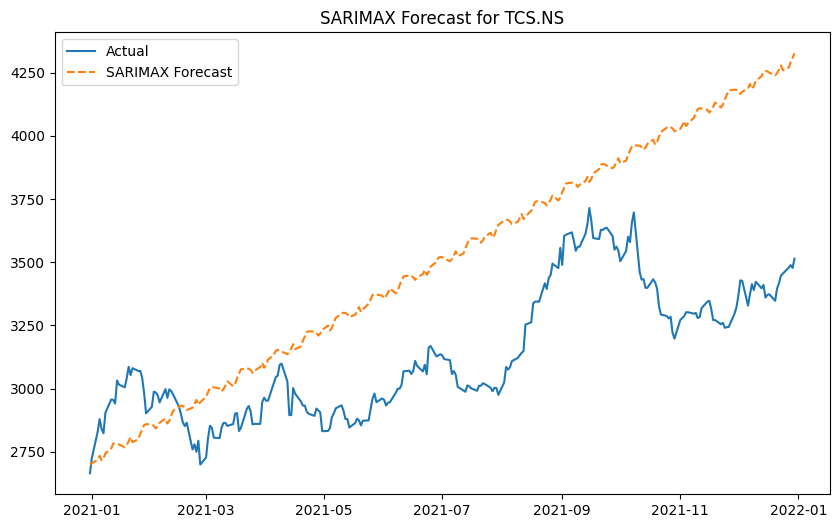


Forecasting HDFCBANK.NS with SARIMAX (using Volume)


C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_train.fillna(method='ffill', inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_train.fillna(method='bfill', inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_test.fillna(method='ffill', inplace=True)
C:\Users\aayus\AppData\Local\Temp\ipykernel_736\4113067318.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous_test.fillna(method='bfill', in

HDFCBANK.NS - SARIMAX RMSE: 368.3717, MAE: 312.0920


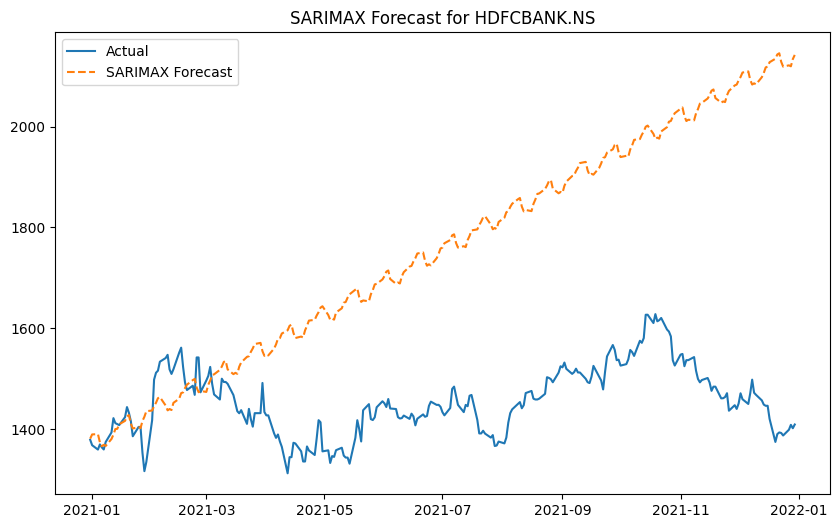

In [37]:
for ticker in combined_data.columns:
    print(f"\nForecasting {ticker} with SARIMAX (using Volume)")

    endog = train_data[ticker]
    exogenous_train = aligned_data[f"{ticker}_volume"].iloc[:train_end_date].reindex(endog.index)

    exogenous_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    exogenous_train.fillna(method='ffill', inplace=True)
    exogenous_train.fillna(method='bfill', inplace=True)

    exogenous_test = aligned_data[f"{ticker}_volume"].iloc[train_end_date:].reindex(test_data.index)

    exogenous_test.replace([np.inf, -np.inf], np.nan, inplace=True)
    exogenous_test.fillna(method='ffill', inplace=True)
    exogenous_test.fillna(method='bfill', inplace=True)

    # Fit SARIMAX model
    sarimax_model = SARIMAX(endog, 
                            order=(1, 1, 1), 
                            seasonal_order=(1, 1, 1, 12), 
                            exog=exogenous_train)
    sarimax_result = sarimax_model.fit(disp=False)

    forecast = sarimax_result.forecast(steps=len(test_data), exog=exogenous_test)
    sarimax_forecasts[ticker] = forecast

    errors = test_data[ticker] - forecast
    rmse = np.sqrt(np.mean(errors**2))
    mae = np.mean(np.abs(errors))
    sarimax_errors[ticker] = {'RMSE': rmse, 'MAE': mae}

    print(f"{ticker} - SARIMAX RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(test_data[ticker], label="Actual")
    plt.plot(forecast, label="SARIMAX Forecast", linestyle='--')
    plt.title(f"SARIMAX Forecast for {ticker}")
    plt.legend()
    plt.show()
